<a href="https://colab.research.google.com/github/puhomath/professional/blob/main/%D0%97%D0%B0%D1%87%D0%B5%D1%82_3_%D0%A0%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<center> ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ ОБРАЗОВАТЕЛЬНОЕ УЧРЕЖДЕНИЕ</center>**
**<center>ГОРОДА МОСКВЫ</center>**
**<center>ДОПОЛНИТЕЛЬНОГО ПРОФЕССИОНАЛЬНОГО ОБРАЗОВАНИЯ</center>**
**<center>ЦЕНТР ПРОФЕССИОНАЛЬНЫХ КВАЛИФИКАЦИЙ И СОДЕЙСТВИЯ ТРУДОУСТРОЙСТВУ</center>**
**<center>«ПРОФЕССИОНАЛ»</center>**
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

#### <center> ИТОГОВАЯ АТТЕСТАЦИОННАЯ РАБОТА </center>
<center> на тему </center>
<center> «Анализ данных с использованием Python» </center>
<center> (на примере задачи определения рейтинга вина) </center>
<center>слушателя Семенова Ивана Ивановича<br>группы № 110 </center>
 <center>по программе профессиональной переподготовки </center>
<center> «Аналитик данных» </center>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

#### <center> Москва, 2022

Описание задачи:

Необходимо выявить определяющие популярность марки вина закономерности и попытаться выяснить, что можно предложить покупателям вина при выборе вина. Это позволит сделать ставку на потенциально популярный продукт и спланировать например рекламную кампанию для интернет-магазинов, осуществляющих продажи вина.

Выполнение задачи предполагает:
1.  <a href=#2>Предобработку данных</a>
2.  <a href=#3>Исследовательский анализ данных</a>
3.  <a href=#4>Исследвать зависимость цены и рейтинга вина</a>
4.  <a href=#5>Проверку гипотез</a>
5.  <a href=#6>Выводы</a>

Цель этого проекта — выяснить, почему вино так популярно в мире с точки зрения анализа данных. Другими словами, выявить, какие признаки больше всего влияют на рейтинг вина. Для анализа используется набор данных из Kaggle, крупнейшего в мире сообщества специалистов по данным и машинному обучению. Набор данных состоит из 13 признаков (2 числовых признака и 11 категориальных признаков).

#  <a name="1">1.Предобработка данных</a>
Основные задачи этапа:
1. Импортировать библиотеки;
2. Загрузить данные;
3. Провести замену названий столбцов; (при необходимости);
4. Преобразовать данные в соответствующие типы;
5. Обработать пропуски (при необходимости);
6. Проверить дубликаты.

Импортируем необходимые библиотеки

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

import scipy.stats as st
# импорт библиотеки warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#### Столбцы данных

- Страна - страна происхождения вина.
- Описание — описание вкусового профиля вина.
- Обозначение - Виноградник, откуда берется виноград для вина.
- Баллы - количество баллов, которое журнал Wine Enthusiast оценил вину по шкале от 1 до 100.
- Цена - Стоимость одной бутылки вина.
- Провинция — провинция или штат, из которого произведено вино.
- Регион 1 — зона виноделия в провинции или штате (например, долина Напа в Калифорнии).
- Регион 2 — (необязательно) более конкретный регион в винодельческой области (например, Резерфорд в долине Напа).
- Разновидность — сорт винограда, из которого делают вино (например, Пино Нуар).
- Винодельня — винодельня, производящая вино.

Загрузка данных

In [ ]:
df = pd.read_csv('wine_reviews.csv')
df

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,"With a delicate, silky mouthfeel and bright ac...",NaN,86,23.0,California,Central Coast,Central Coast,Pinot Noir,MacMurray Ranch
1,Italy,D'Alceo is a drop dead gorgeous wine that ooze...,D'Alceo,96,275.0,Tuscany,Toscana,NaN,Red Blend,Castello dei Rampolla
2,France,The great dominance of Cabernet Sauvignon in t...,NaN,91,40.0,Bordeaux,Haut-Médoc,NaN,Bordeaux-style Red Blend,Château Bernadotte
3,Italy,"The modest cherry, dark berry and black tea no...",NaN,81,15.0,Tuscany,Chianti Classico,NaN,Sangiovese,Valiano
4,US,"Exceedingly light in color, scent and flavor, ...",NaN,83,25.0,Oregon,Rogue Valley,Southern Oregon,Pinot Noir,Deer Creek
...,...,...,...,...,...,...,...,...,...,...
19995,France,"Firm wine, with tannins to match the chunky st...",Mansois,88,12.0,Southwest France,Marcillac,NaN,Mansois,Lionel Osmin & Cie
19996,US,The vineyard is on the Napa side of Carneros. ...,Estate Vineyard,89,50.0,California,Carneros,Napa-Sonoma,Pinot Noir,Bouchaine
19997,Italy,Lighea is a terrific wine and an excellent pai...,Lighea,87,20.0,Sicily & Sardinia,Sicilia,NaN,Zibibbo,Donnafugata
19998,Italy,Organically farmed Cannonau grapes deliver sma...,Le Sabbie,87,NaN,Sicily & Sardinia,Cannonau di Sardegna,NaN,Cannonau,Meloni


In [ ]:
shape = df.shape
print("Размер строк и столбцов (rows, columns):\t {}".format(shape))

Размер строк и столбцов (rows, columns):	 (20000, 10)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      20000 non-null  object 
 1   description  20000 non-null  object 
 2   designation  13999 non-null  object 
 3   points       20000 non-null  int64  
 4   price        18198 non-null  float64
 5   province     20000 non-null  object 
 6   region_1     16543 non-null  object 
 7   region_2     8058 non-null   object 
 8   variety      20000 non-null  object 
 9   winery       20000 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.5+ MB


Количество значений в столбцах различается. Это говорит о том, что в данных есть пустые значения. Признак points и price числовые. С помощью библиотеки seaborn построим тепловую карту для визуализации данных.

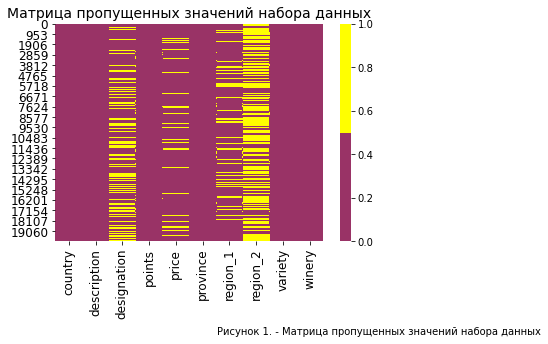

In [ ]:
colours = ['#993366', '#FFFF00']
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))
# Decorations
plt.title('Матрица пропущенных значений набора данных', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.figtext(0.5, -0.2, "Рисунок 1. - Матрица пропущенных значений набора данных")
plt.show()

Количество пропущенных значений в каждой переменной.

In [ ]:
print(df.isnull().sum())

country            0
description        0
designation     6001
points             0
price           1802
province           0
region_1        3457
region_2       11942
variety            0
winery             0
dtype: int64


In [ ]:
MissingValue = df.isnull().sum().sort_values(ascending = False)
Percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
MissingData = pd.concat([MissingValue, Percent], axis=1, keys=['MissingValue', 'Percent'])
MissingData

,MissingValue,Percent
region_2,11942,59.710
designation,6001,30.005
region_1,3457,17.285
price,1802,9.010
winery,0,0.000
variety,0,0.000
province,0,0.000
points,0,0.000
description,0,0.000
country,0,0.000


Поля region_2 не заполнен более чам на 50 %, удалим этот признак. Так как он не информативен.  

In [ ]:
# Drops unnecessary columns
df = df.drop(columns = ["region_2"])

Удалим пустые строки с ценами

In [ ]:
total_records = len(df)
missing_prices = df["price"].isnull().sum()
missing_ratio = 100 - ((missing_prices / total_records) * 100)
print("Количество рпопущеных значений: {}".format(missing_prices)+ "\n" +
      "Всего записей: {}".format(total_records) + "\n" +
      "Процентное соотношение после удаления столбцов: {:.2f}%".format(missing_ratio))

Количество рпопущеных значений: 1802
Всего записей: 20000
Процентное соотношение после удаления столбцов: 90.99%


Если мы удалим все записи с отсутствующими ценами, мы останемся с 90,99% набора данных. Мы можем смело отбрасывать записи с отсутствующими значениями и не влиять на результаты кардинально.

In [ ]:
df = df.dropna(axis='index', how='any', subset=['price'])
print(df.count())

country        18198
description    18198
designation    12637
points         18198
price          18198
province       18198
region_1       15033
variety        18198
winery         18198
dtype: int64


In [ ]:
print(df.isnull().sum())

country           0
description       0
designation    5561
points            0
price             0
province          0
region_1       3165
variety           0
winery            0
dtype: int64


Оставим region_1 и designation без изменения

Добавим столбец цвет вина

In [ ]:
color = {
"Chardonnay": "white",
"Pinot Noir": "red",
"Cabernet Sauvignon": "red",
"Red Blend": "red",
"Bordeaux-style Red Blend": "red",
"Sauvignon Blanc": "white",
"Syrah": "red",
"Riesling": "white",
"Merlot": "red",
"Zinfandel": "red",
"Sangiovese": "red",
"Malbec": "red",
"White Blend": "white",
"Rosé": "other",
"Tempranillo": "red",
"Nebbiolo": "red",
"Portuguese Red": "red",
"Sparkling Blend": "other",
"Shiraz": "red",
"Corvina, Rondinella, Molinara": "red",
"Rhône-style Red Blend": "red",
"Barbera": "red",
"Pinot Gris": "white",
"Viognier": "white",
"Bordeaux-style White Blend": "white",
"Champagne Blend": "other",
"Port": "red",
"Grüner Veltliner": "white",
"Gewürztraminer": "white",
"Portuguese White": "white",
"Petite Sirah": "red",
"Carmenère": "red"
}
df['color']= df['variety'].map(color)
df = df.dropna(axis='index', how='any', subset=['color'])
print(df.count())

country        15041
description    15041
designation    10526
points         15041
price          15041
province       15041
region_1       12365
variety        15041
winery         15041
color          15041
dtype: int64


Удалим дубликаты

In [ ]:
df=df.drop_duplicates(keep=False)
df.head()

,country,description,designation,points,price,province,region_1,variety,winery,color
0,US,"With a delicate, silky mouthfeel and bright ac...",NaN,86,23.0,California,Central Coast,Pinot Noir,MacMurray Ranch,red
1,Italy,D'Alceo is a drop dead gorgeous wine that ooze...,D'Alceo,96,275.0,Tuscany,Toscana,Red Blend,Castello dei Rampolla,red
2,France,The great dominance of Cabernet Sauvignon in t...,NaN,91,40.0,Bordeaux,Haut-Médoc,Bordeaux-style Red Blend,Château Bernadotte,red
3,Italy,"The modest cherry, dark berry and black tea no...",NaN,81,15.0,Tuscany,Chianti Classico,Sangiovese,Valiano,red
4,US,"Exceedingly light in color, scent and flavor, ...",NaN,83,25.0,Oregon,Rogue Valley,Pinot Noir,Deer Creek,red


In [ ]:
print(df.count())

country        13388
description    13388
designation     9363
points         13388
price          13388
province       13388
region_1       11017
variety        13388
winery         13388
color          13388
dtype: int64


#  <a name="2">2. Исследовательский анализ данных</a>
Основные задачи этапа:<br>

1.  Рассмотрим каждый признак датафрейма
2. Для каждой страны найдите среднюю цену вина.Для каждой страны найдите максимальную цену вина.Для каждой страны найдите минимальную цену вина. Для каждой страны найдите количество записей.
3. Определить, какие вины лидируют по рейтингам. Выберите несколько вин с  наилучшим рейтингом.
- Построить график «ящик с усами» по рейтингам в разбивке по странам, по сортам вина. Опишите результат.
- Определить, как влияют отзывы внутри одной страны на цены.
- Построить диаграмму рассеяния и посчитайте корреляцию между рейтингами и ценами. Сформулировать выводы.
- Посмотреть на общее распределение вин по странам. Что можно сказать о самых распрастраненных сортах вина?
- Вина какой области (province) получают наилучший рейтинг?Более дорогие вина оцениваются выше?
- В какой части мира производят вина с более высоким рейтингом?
- Какое описание вин более высоко оценено?
- Какой сорт вина более высоко оценен?
- Сколько денег стоит получить вино с высоким рейтингом в стране?
- Какие винодельни производят самые дорогие/высоко оцененные вина?
- Какие винодельни/регионы/страны производят вина с самым низким рейтингом?
3. Провести анализ сорта вина (например, белого вина Шардоне) и проанализировал стоимость и качество в основных регионах-производителях в мире.


## Рассмотрим каждый признак датафрейма

In [ ]:
df.describe()

,points,price
count,13388.000000,13388.000000
mean,87.889080,34.804228
std,3.287479,42.989997
min,80.000000,5.000000
25%,86.000000,16.000000
50%,88.000000,25.000000
75%,90.000000,41.000000
max,100.000000,2300.000000


In [ ]:
df.describe(include=['O'])

,country,description,designation,province,region_1,variety,winery,color
count,13388,13388,9363,13388,11017,13388,13388,13388
unique,32,13387,6473,255,684,32,5665,3
top,US,"Ripe plum, game, truffle, leather and menthol ...",Reserve,California,Napa Valley,Pinot Noir,Williams Selyem,red
freq,6628,2,283,4806,670,1660,46,8794


### Страны (Country)

In [ ]:
df["country"].describe()

count     13388
unique       32
top          US
freq       6628
Name: country, dtype: object

В наборе данных встречается 32 страны.Самая часта страна США  она встречается 6628 раз.

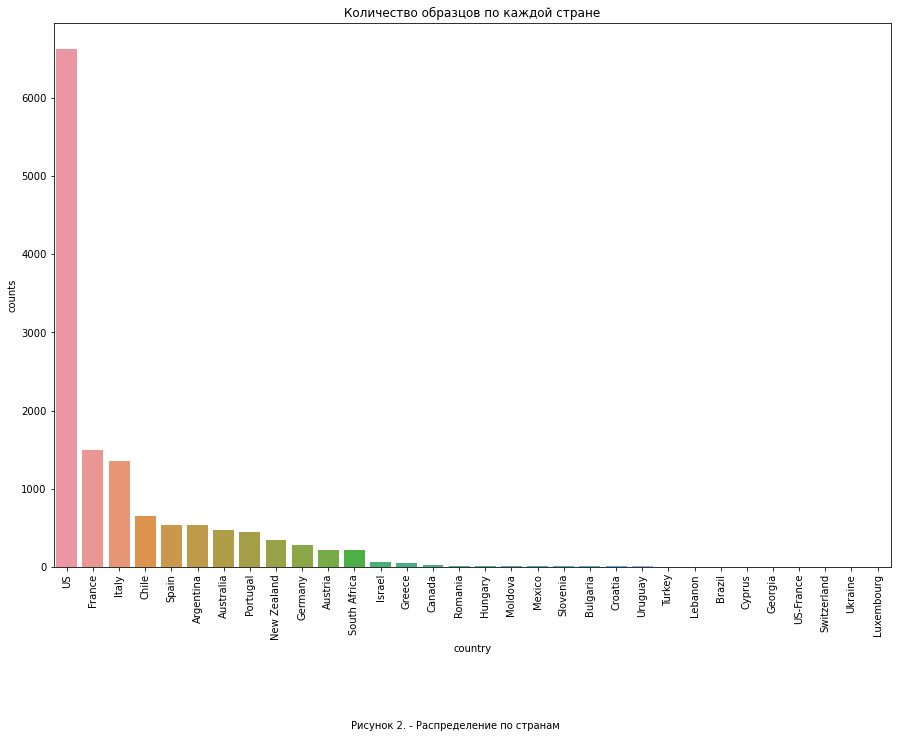

In [ ]:
df_country = df['country'].value_counts().to_frame()
df_country.reset_index(inplace=True)
df_country.columns = ['country','counts']
fig, ax = plt.subplots(figsize=(15,10));
sns.barplot(data = df_country, x='country',y='counts',ax=ax).set_title('Количество образцов по каждой стране');
plt.figtext(0.4, -0.1, "Рисунок 2. - Распределение по странам ")
plt.xticks(rotation='vertical');

В наборе данных около 40% из них были из США, далее идет Франция, Италия, Чили. Такая тенденция может быть объяснена тем, что набор данных был подготовлоен журналом из США.

Выведем ТОП 10 наиболее часто встречающихся стран в наборе данных.

In [ ]:
countries_list = pd.DataFrame(df.country.value_counts(dropna = True)).iloc[0:10]
countries_list['Index'] = list(range(0,10))
countries_list['Country_Name'] = countries_list.index.values
countries_list.set_index('Index',inplace = True)
countries_list.columns = ['Number Of Wines Produced','Country']

countries_list

,Number Of Wines Produced,Country
Index,,
0,6628,US
1,1493,France
2,1350,Italy
3,654,Chile
4,541,Spain
5,536,Argentina
6,466,Australia
7,443,Portugal
8,346,New Zealand


Внесем столбец континент в набор данных

In [ ]:
# Comparing rating per continent

#creating dictionary for country and its continent
country_to_continent = {
    'Italy':'Europe',
    'Portugal':'Europe',
    'US':'North America',
    'Spain':'Europe',
    'France':'Europe',
    'Germany':'Europe',
    'Argentina':'Latin America',
    'Chile':'Latin America',
    'Australia': 'Oceania',
    'Austria': 'Europe',
    'South Africa': 'Africa',
    'New Zealand': 'Oceania',
    'Israel': 'Asia',
    'Hungary':'Europe',
    'Greece':'Europe',
    'Romania':'Europe',
    'Mexico':'Latin America',
    'Canada':'North America',
    'Turkey': 'Asia',
    'Czech Republic': 'Europe',
    'Slovenia': 'Europe',
    'Luxembourg': 'Europe',
    'Croatia': 'Europe',
    'Georgia':'Europe',
    'Uruguay': 'Latin America',
    'England': 'Europe',
    'Lebanon': 'Asia',
    'Serbia': 'Europe',
    'Brazil': 'Latin America',
    'Moldova': 'Europe',
    'Morocco':'Africa',
    'Peru':'Latin America',
    'India':'Asia',
    'Bulgaria':'Europe',
    'Cyprus': 'Europe',
    'Armenia':'Asia',
    'Switzerland':'Europe',
    'Bosnia and Herzegovina':'Europe',
    'Ukraine':'Europe',
    'Slovakia':'Europe',
    'Macedonia':'Europe',
    'China':'Asia',
    'Egypt':'Africa'
    }
# wine_df['country'].unique()
# type(country)

#adding column to put column from the country
df['continent'] =df['country'].map(country_to_continent)
df

,country,description,designation,points,price,province,region_1,variety,winery,color,continent
0,US,"With a delicate, silky mouthfeel and bright ac...",NaN,86,23.0,California,Central Coast,Pinot Noir,MacMurray Ranch,red,North America
1,Italy,D'Alceo is a drop dead gorgeous wine that ooze...,D'Alceo,96,275.0,Tuscany,Toscana,Red Blend,Castello dei Rampolla,red,Europe
2,France,The great dominance of Cabernet Sauvignon in t...,NaN,91,40.0,Bordeaux,Haut-Médoc,Bordeaux-style Red Blend,Château Bernadotte,red,Europe
3,Italy,"The modest cherry, dark berry and black tea no...",NaN,81,15.0,Tuscany,Chianti Classico,Sangiovese,Valiano,red,Europe
4,US,"Exceedingly light in color, scent and flavor, ...",NaN,83,25.0,Oregon,Rogue Valley,Pinot Noir,Deer Creek,red,North America
...,...,...,...,...,...,...,...,...,...,...,...
19991,South Africa,"Muscular spice, deep red berry and blackberry ...",Estate,90,27.0,Stellenbosch,NaN,Shiraz,Rust en Vrede,red,Africa
19993,France,"A beautifully elegant wine, wearing its fresh ...",Montmains Premier Cru,94,32.0,Burgundy,Chablis,Chardonnay,William Fèvre,white,Europe
19994,US,"A little too strong in feline spray character,...",Grand Reserve,84,20.0,California,Mendocino County,Sauvignon Blanc,Kendall-Jackson,white,North America
19996,US,The vineyard is on the Napa side of Carneros. ...,Estate Vineyard,89,50.0,California,Carneros,Pinot Noir,Bouchaine,red,North America


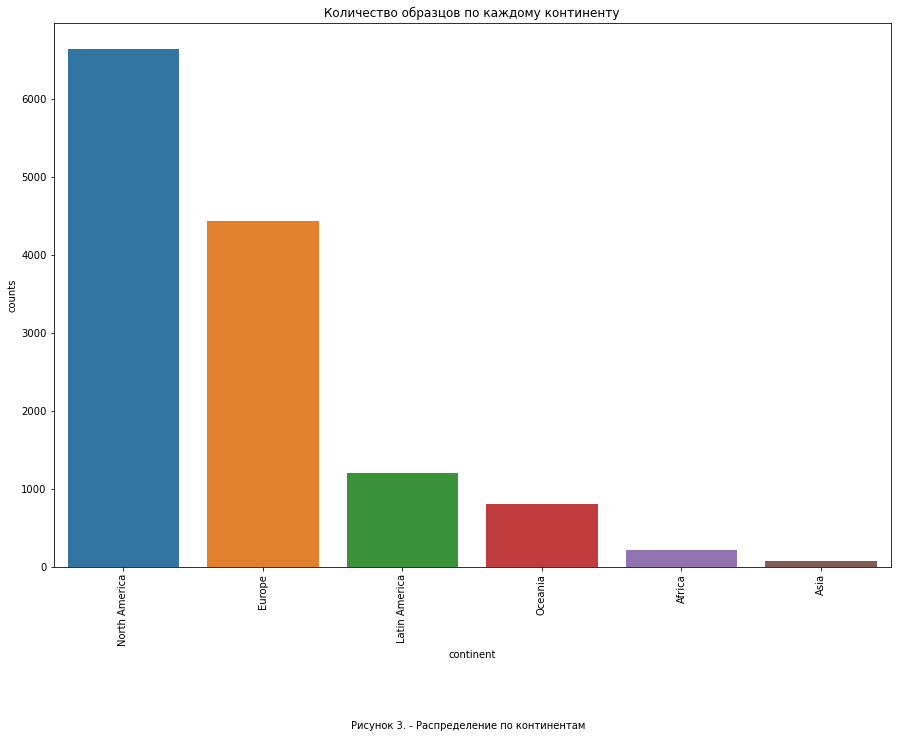

In [ ]:
df_country = df['continent'].value_counts().to_frame()
df_country.reset_index(inplace=True)
df_country.columns = ['continent','counts']
fig, ax = plt.subplots(figsize=(15,10));
sns.barplot(data = df_country, x='continent',y='counts',ax=ax).set_title('Количество образцов по каждому континенту');
plt.figtext(0.4, -0.1, "Рисунок 3. - Распределение по континентам ")
plt.xticks(rotation='vertical');

Для данного набора данных лидиром среди континентов является Северная Америка.

## Признак designation

In [ ]:
df.designation.value_counts()
df.designation.value_counts()[:10]

Reserve           283
Estate            182
Reserva           175
Estate Grown       53
Riserva            50
Estate Bottled     43
Brut               39
Old Vine           35
Dry                34
Gran Reserva       27
Name: designation, dtype: int64

### Рейтинг (points)


In [ ]:
df["points"].describe()

count    13388.000000
mean        87.889080
std          3.287479
min         80.000000
25%         86.000000
50%         88.000000
75%         90.000000
max        100.000000
Name: points, dtype: float64

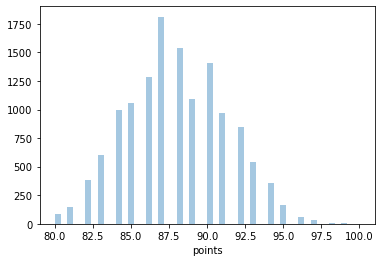

In [ ]:
sns.distplot(df.points, kde=False)
plt.show()

Построим столбчатую диаграмму, иллюстрирующую количество вин в каждом рейтинговом балле

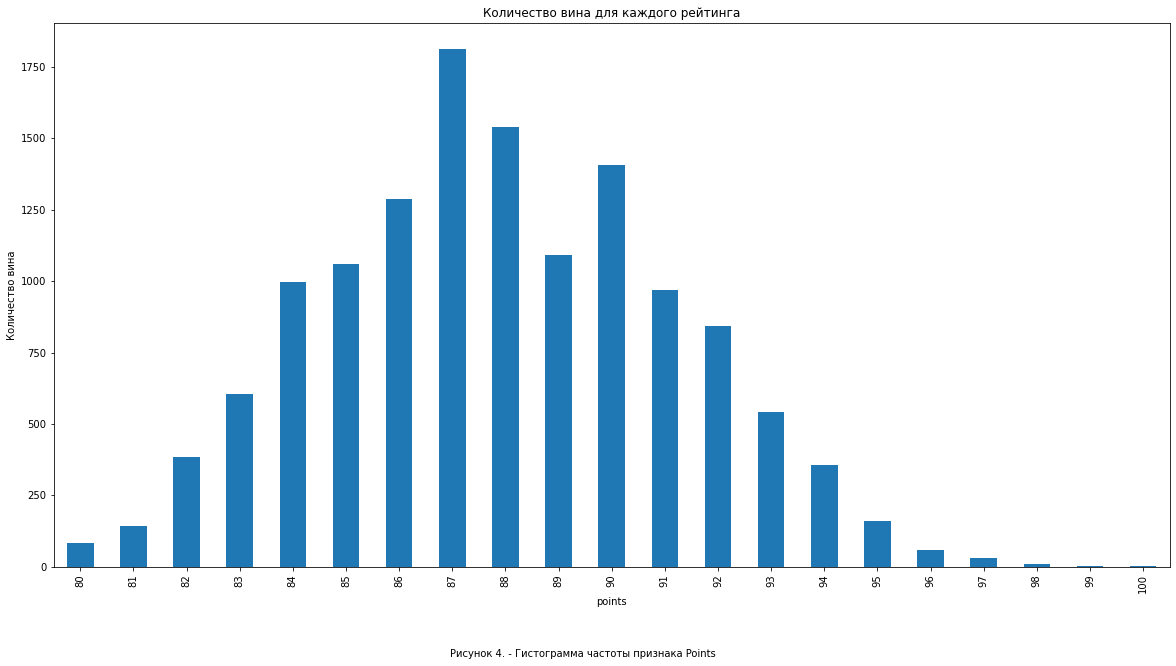

In [ ]:

fig, ax = plt.subplots(figsize=(20,10))
plt.xlabel("Рейтинг")
plt.ylabel("Количество вина")
plt.title("Количество вина для каждого рейтинга")
df.groupby(['points']).count()['description'].plot(ax=ax, kind='bar')
plt.figtext(0.4, 0, "Рисунок 4. - Гистограмма частоты признака Points ")
plt.show()

Text(0.5, -0.2, 'Рисунок 5. - Полиглн частот признака Points')

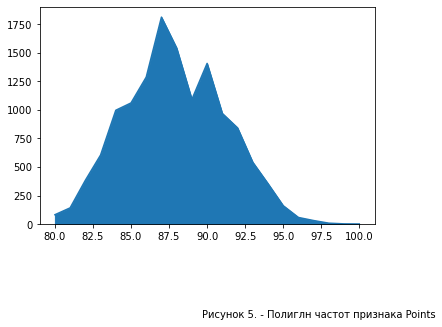

In [ ]:
df['points'].value_counts().sort_index().plot.area()
plt.figtext(0.5, -0.2, "Рисунок 5. - Полиглн частот признака Points" )

Определим средний рейтин в наборе данных

In [ ]:
avg_rating = df["points"].mean()
avg_rating

87.88907977293098

В среднем рейтинг вина составляет 87,9 баллов для данного признака. внесем классификацию на хорошие вина(вина где рейтинг выше среднего)

In [ ]:
def GoodRating(row):
    if row['points'] >= 88:
        val = 1
    else:
        val = 0
    return(val)
df['Good'] = df.apply(GoodRating, axis=1)
df.head()

,country,description,designation,points,price,province,region_1,variety,winery,color,continent,Good
0,US,"With a delicate, silky mouthfeel and bright ac...",NaN,86,23.0,California,Central Coast,Pinot Noir,MacMurray Ranch,red,North America,0
1,Italy,D'Alceo is a drop dead gorgeous wine that ooze...,D'Alceo,96,275.0,Tuscany,Toscana,Red Blend,Castello dei Rampolla,red,Europe,1
2,France,The great dominance of Cabernet Sauvignon in t...,NaN,91,40.0,Bordeaux,Haut-Médoc,Bordeaux-style Red Blend,Château Bernadotte,red,Europe,1
3,Italy,"The modest cherry, dark berry and black tea no...",NaN,81,15.0,Tuscany,Chianti Classico,Sangiovese,Valiano,red,Europe,0
4,US,"Exceedingly light in color, scent and flavor, ...",NaN,83,25.0,Oregon,Rogue Valley,Pinot Noir,Deer Creek,red,North America,0


Text(0.5, 0, 'Рисунок 6. - Зависимость рейтинга от топ 10 популярных сортов винограда')

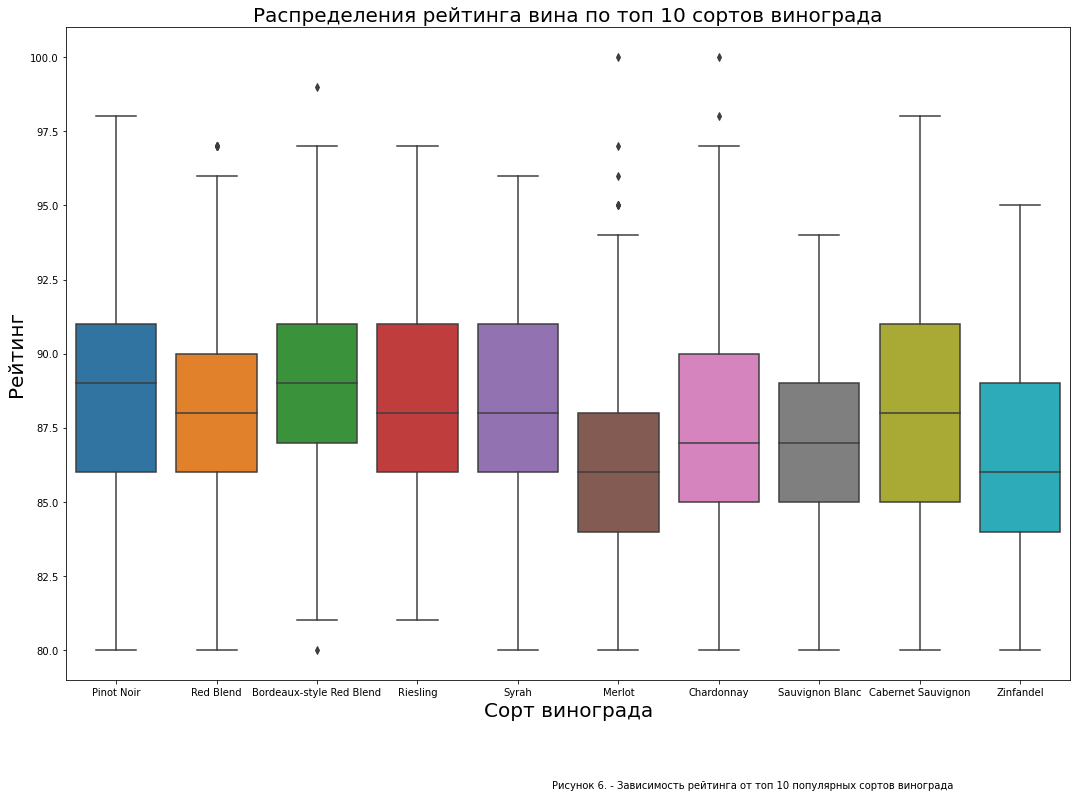

In [ ]:
fig = plt.figure(figsize=(18,12))
top_reviewed_wines = df.variety.value_counts().head(10)
points_top_reviewed_wines = df[df.variety.isin(top_reviewed_wines.index)]
x = points_top_reviewed_wines.variety
y = points_top_reviewed_wines.points
sns.boxplot(x,y)
plt.xlabel('Сорт винограда', fontsize=20)
plt.ylabel('Рейтинг', fontsize=20)
plt.title('Распределения рейтинга вина по топ 10 сортов винограда',fontsize=20)
plt.figtext(0.5, 0, "Рисунок 6. - Зависимость рейтинга от топ 10 популярных сортов винограда" )

Среди высокие рейтинги у сортов Bordeaux-style Red Blend
и Bordeaux-style Red Blend.

In [ ]:
res = pd.DataFrame(df[df['variety'] == 'Pinot Noir'].groupby('points').count()).iloc[:,0]
variety_points_dist = res
res = pd.DataFrame(df[df['variety'] == 'Chardonnay'].groupby('points').count()).iloc[:,0]
variety_points_dist = pd.concat([variety_points_dist,res],axis = 1)
res = pd.DataFrame(df[df['variety'] == 'Cabernet Sauvignon'].groupby('points').count()).iloc[:,0]
variety_points_dist = pd.concat([variety_points_dist,res],axis = 1)
res = pd.DataFrame(df[df['variety'] == 'Red Blend'].groupby('points').count()).iloc[:,0]
variety_points_dist = pd.concat([variety_points_dist,res],axis = 1)
res = pd.DataFrame(df[df['variety'] == 'Bordeaux-style Red Blend'].groupby('points').count()).iloc[:,0]
variety_points_dist = pd.concat([variety_points_dist,res],axis = 1)
variety_points_dist.columns = ['Pinot Noir','Chardonnay','Cabernet Sauvignon','Red Blend','Bordeaux-style Red Blend']
variety_points_dist

,Pinot Noir,Chardonnay,Cabernet Sauvignon,Red Blend,Bordeaux-style Red Blend
points,,,,,
80,5.0,9.0,6.0,7.0,1.0
81,6.0,17.0,19.0,14.0,3.0
82,31.0,59.0,57.0,23.0,4.0
83,54.0,87.0,82.0,33.0,13.0
84,87.0,139.0,99.0,82.0,27.0
85,111.0,125.0,119.0,66.0,39.0
86,152.0,162.0,125.0,109.0,48.0
87,197.0,238.0,169.0,135.0,66.0
88,167.0,154.0,132.0,150.0,58.0


In [ ]:
wines = df.pivot_table(values='points',index=['variety'],columns=['country'],aggfunc='mean')
wines.head()

country,Argentina,Australia,Austria,Brazil,Bulgaria,Canada,Chile,Croatia,Cyprus,France,...,Romania,Slovenia,South Africa,Spain,Switzerland,Turkey,US,US-France,Ukraine,Uruguay
variety,,,,,,,,,,,,,,,,,,,,,
Barbera,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,86.250000,NaN,NaN,NaN
Bordeaux-style Red Blend,88.923077,88.764706,92.0,NaN,NaN,NaN,89.714286,NaN,NaN,88.33195,...,NaN,89.0,88.769231,85.500000,NaN,NaN,89.237885,NaN,NaN,NaN
Bordeaux-style White Blend,83.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.60000,...,NaN,NaN,NaN,NaN,NaN,NaN,88.000000,NaN,NaN,NaN
Cabernet Sauvignon,84.921348,88.287879,NaN,NaN,83.0,NaN,86.380645,NaN,NaN,88.75000,...,84.0,NaN,87.960000,85.888889,NaN,NaN,88.618957,NaN,NaN,87.0
Carmenère,NaN,NaN,NaN,NaN,NaN,NaN,86.223684,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,88.400000,NaN,NaN,NaN


Text(0.5, -0.3, 'Рисунок 7. - Зависимость сорта винограда от страны')

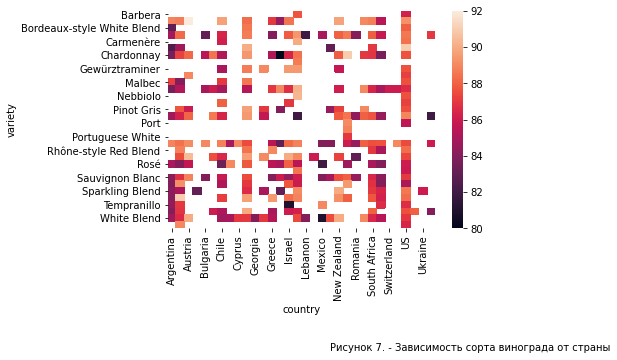

In [ ]:

sns.heatmap(wines)
plt.figtext(0.5, -0.3, "Рисунок 7. - Зависимость сорта винограда от страны" )

In [ ]:
wines = df.pivot_table(values='points',index=['variety'],columns=['designation'],aggfunc='mean')
wines.head()

designation,'A Naca Rosso,'l Clumbé,0 Degree Dry,0 Degrees,1 Lage,1 er Cru Charmes,1-liter,10 Vine Age Series,10 Years Old Tawny,10-Year-Old Tawny,...,Étoile Brut,Ürziger Goldwingert Auslese,Ürziger Goldwingert Spätlese,Ürziger Würzgarten,Ürziger Würzgarten Auslese,Ürziger Würzgarten Auslese *,Ürziger Würzgarten Auslese Goldkap,Ürziger Würzgarten Beerenauslese,Ürziger Würzgarten Kabinett,Ürziger Würzgarten Spätlese
variety,,,,,,,,,,,,,,,,,,,,,
Barbera,NaN,87.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bordeaux-style Red Blend,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bordeaux-style White Blend,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cabernet Sauvignon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Carmenère,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, -0.8, 'Рисунок 8. - Зависимость сорта винограда от винодени')

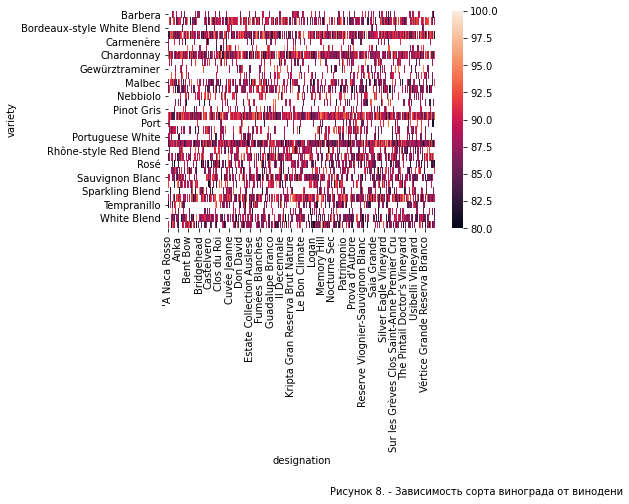

In [ ]:

sns.heatmap(wines)
plt.figtext(0.5, -0.8 , "Рисунок 8. - Зависимость сорта винограда от винодени" )

Посмотрим рейтинг в зависимости от страны

In [ ]:
#количество просмотров количество отзывов в разбивке по странам винодельни, использующие максимальное количество сортов винограда
country= df.groupby('country').agg({'points': ['mean','median', 'var','std','sem']})

country['Counts'] =df['country'].value_counts()

# took out countries with less than 1000 reviews
country_1000 = country[country['Counts']>1000]
country_1000

points                                       Counts
              mean median        var       std       sem       
country                                                        
France   88.748158   88.0   9.734120  3.119955  0.080746   1493
Italy    88.709630   88.0   8.178039  2.859727  0.077832   1350
US       87.900724   88.0  11.921635  3.452772  0.042411   6628

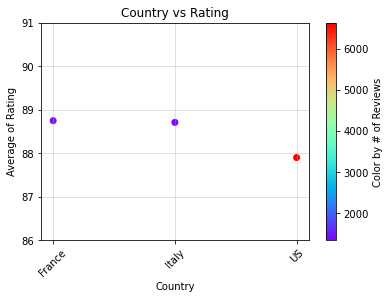

In [ ]:
#sorted the data with rating
country_plot = pd.DataFrame(country_1000).reset_index()
#country_plot['points']['mean']
country_plot = country_plot.sort_values(('points','mean'), ascending=False)
country_plot
plt.xticks(rotation = 45)
plt.xlabel("Country")
plt.ylabel("Average of Rating")
plt.title("Country vs Rating")
plt.ylim(86,91)
# plt.legend(loc = "lower right")
plt.grid(alpha = 0.5)
# plt.errorbar(country_plot['country'], country_plot[('points','mean')], yerr=country_plot[('points','sem')])#,  c=country_plot['Counts'],cmap=cm.cool)
plt.scatter(country_plot['country'],country_plot[('points','mean')], c=country_plot['Counts'], cmap= cm.rainbow)
plt.colorbar(cmap=cm.rainbow, orientation='vertical', label = "Color by # of Reviews")
plt.show()

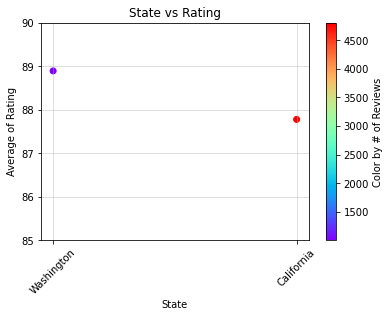

In [ ]:
#Adding number of reviews by state column
america = df[df["country"].isin(["US"])]
state= america.groupby('province').agg({'points': ['mean','median', 'var','std','sem']})

state['Counts'] =america['province'].value_counts()
# took out states with less than 500 reviews
state_500 = state[state['Counts']>500]
# putting it back to dataframe to plot
state_plot = pd.DataFrame(state_500).reset_index()
state_plot = state_plot.sort_values(('points','mean'), ascending=False)
state_plot

# Plot graph
plt.scatter(state_plot['province'],state_plot[('points','mean')], c=state_plot['Counts'], cmap=cm.rainbow)
plt.xticks(rotation = 45)
plt.xlabel("State")
plt.ylabel("Average of Rating")
plt.title("State vs Rating")
plt.ylim(85,90)
plt.grid(alpha = 0.5)
plt.colorbar(cmap=cm.rainbow, orientation='vertical', label = "Color by # of Reviews")
plt.show()

Посмотрим средний рейтин по стране

In [ ]:

mean_points = df['points'].groupby(df['country']).mean()
mean_points

country
Argentina       86.251866
Australia       88.038627
Austria         89.254630
Brazil          83.000000
Bulgaria        85.285714
Canada          87.588235
Chile           86.269113
Croatia         85.666667
Cyprus          88.000000
France          88.748158
Georgia         84.000000
Germany         88.968421
Greece          85.591837
Hungary         84.200000
Israel          87.393939
Italy           88.709630
Lebanon         83.333333
Luxembourg      86.000000
Mexico          84.222222
Moldova         84.800000
New Zealand     87.676301
Portugal        88.325056
Romania         84.000000
Slovenia        88.500000
South Africa    87.165094
Spain           86.443623
Switzerland     86.000000
Turkey          88.000000
US              87.900724
US-France       88.000000
Ukraine         86.000000
Uruguay         85.000000
Name: points, dtype: float64

Text(0.5, 0, 'Рисунок 9. - Зависимость рейтинг от страны')

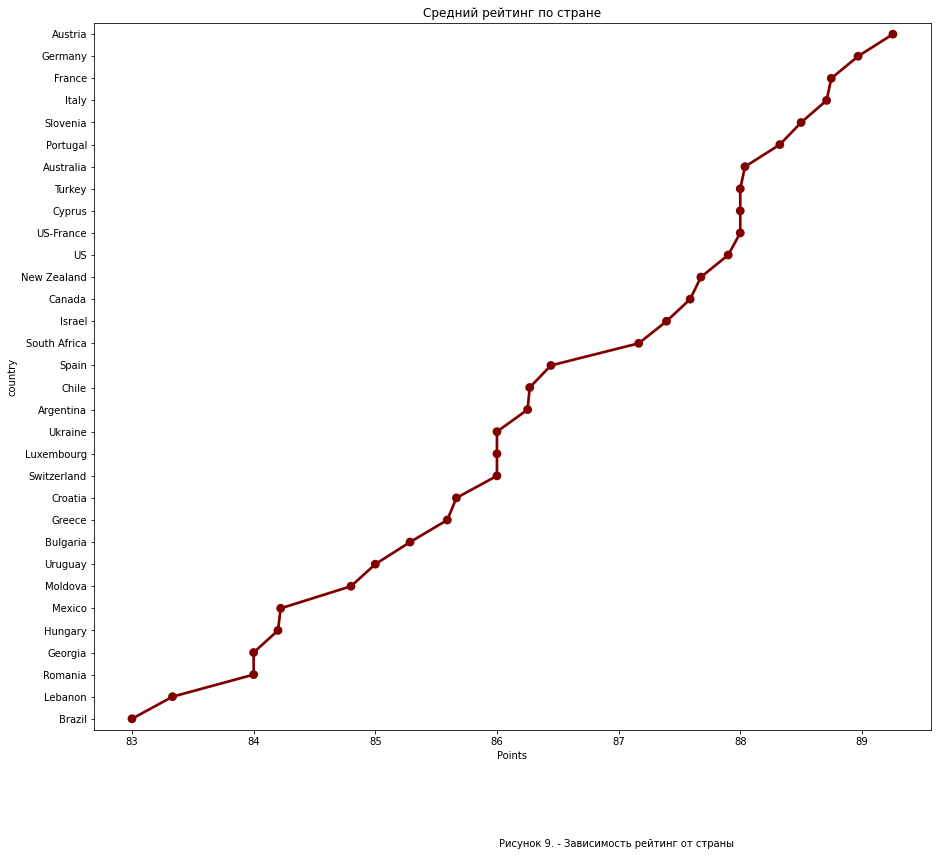

In [ ]:
data_to_plot = df.groupby(['country',]).mean()['points'].sort_values(ascending=False).to_frame()

plt.figure(figsize=(15,13))
sns.pointplot(x = data_to_plot.points ,y = data_to_plot.index, color='maroon', orient='h')
plt.title('Средний рейтинг по стране')
plt.xlabel('Points');
plt.figtext(0.5, 0 , "Рисунок 9. - Зависимость рейтинг от страны" )

Text(0.5, 0, 'Рисунок 10. -Топ  10')

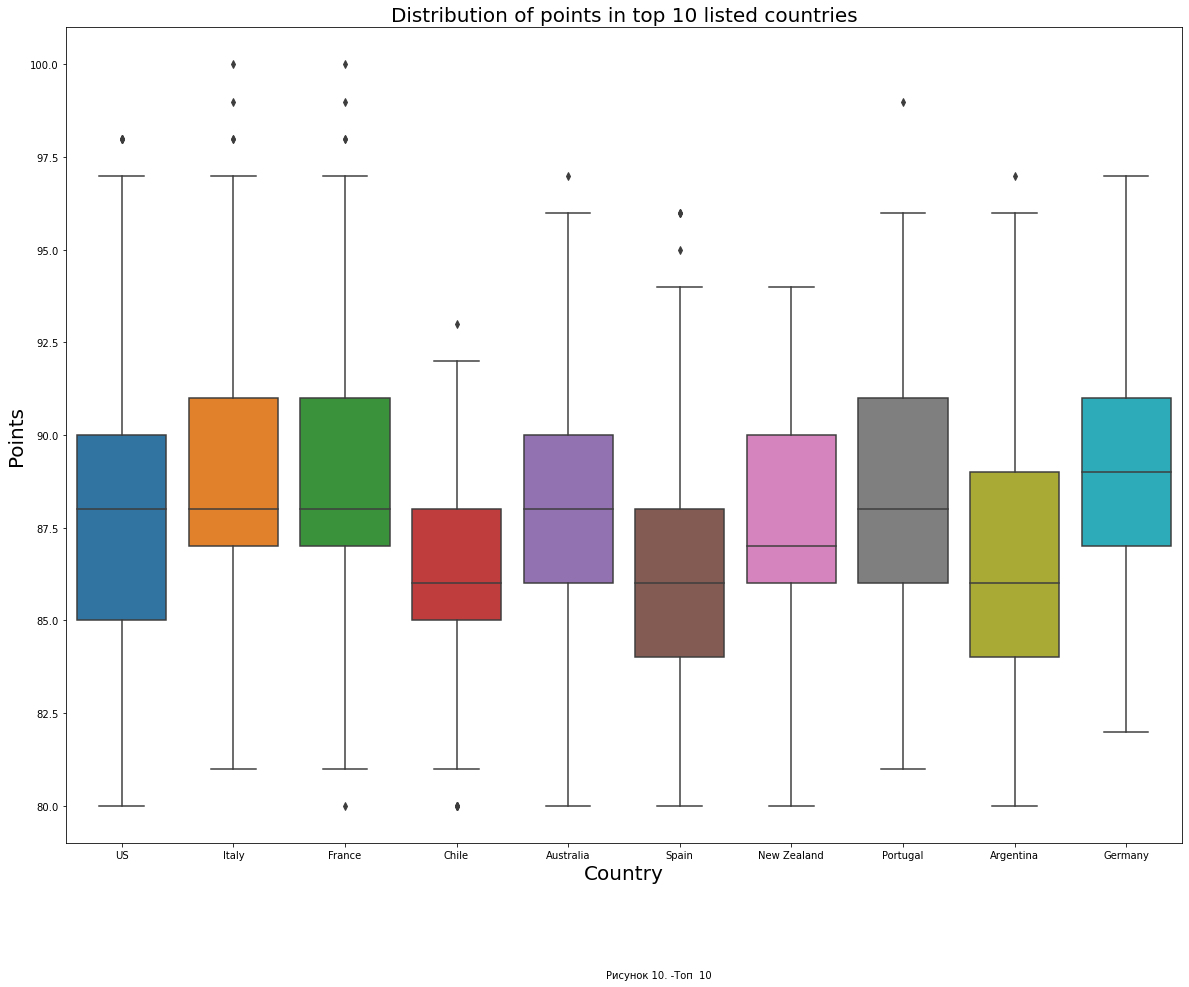

In [ ]:
fig = plt.figure(figsize=(20,15))
top_country_wines = df.country.value_counts().head(10)
points_top_country_wines = df[df.country.isin(top_country_wines.index)]
x = points_top_country_wines.country
y = points_top_country_wines.points
sns.boxplot(x,y)
plt.xlabel('Country', fontsize=20)
plt.ylabel('Points', fontsize=20)
plt.title('Distribution of points in top 10 listed countries',fontsize=20)
plt.figtext(0.5, 0 , "Рисунок 10. -Топ  10" )

На сюжете показано распределение точек топ-10 сортов вин, имеющих максимальное количество отзывов. Этот график в основном предназначен для сравнения лучших рассмотренных вин и проверки их ассортимента и их медиан. Я выбрал коробочный график, чтобы показать распределение каждого сорта. Квадраты и линии - это знаки, представляющие распределения и положение, цвет и площадь - это каналы, показывающие распределение точек и различающие разновидности.


Выведем ТОП - 5 стран с высокими рейтингами

In [ ]:
top_5 = df.groupby('country').mean().sort_values(by = ['points'],ascending = False)
top_5 = pd.DataFrame(top_5.iloc[0:5,0])
top_5['Index'] = list(range(5))
top_5['Country'] = top_5.index.values
top_5.set_index(['Index'],inplace = True)
top_5

,points,Country
Index,,
0,89.254630,Austria
1,88.968421,Germany
2,88.748158,France
3,88.709630,Italy
4,88.500000,Slovenia


Посмотрим распределение рейтинга по Континентам

In [ ]:
continent= df.groupby('continent').agg({'points': ['mean','median', 'var','std','sem']})

#adding columns on numbers of reviews
continent['Counts'] =df['continent'].value_counts()

#creating dataframe
continent_plot = pd.DataFrame(continent).reset_index()
continent_plot = continent_plot.sort_values(("points","mean"), ascending=False)
continent_plot

continent     points                                       Counts
                       mean median        var       std       sem       
2         Europe  88.367793   88.0   9.641450  3.105068  0.046599   4440
4  North America  87.899925   88.0  11.908858  3.450921  0.042334   6645
5        Oceania  87.884236   88.0   7.500762  2.738752  0.096111    812
1           Asia  87.250000   87.5   6.415493  2.532882  0.298503     72
0         Africa  87.165094   87.0   5.711951  2.389969  0.164144    212
3  Latin America  86.235489   86.0   8.762756  2.960195  0.085241   1206

Визуализируем распределение рейтингов по континетам

Text(0.5, -0.2, 'Рисунок 11. - Зависимость рейтига от континента')

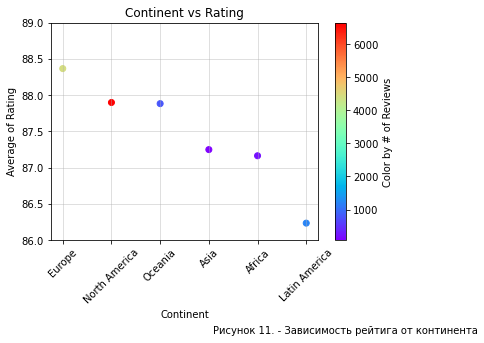

In [ ]:

#scatter plot
plt.scatter(continent_plot['continent'],continent_plot[('points','mean')], c=continent_plot['Counts'], cmap=cm.rainbow)
plt.xticks(rotation = 45)
plt.xlabel("Continent")
plt.ylabel("Average of Rating")
plt.title("Continent vs Rating")
plt.ylim(86,89)
plt.grid(alpha = 0.5)
plt.colorbar(cmap=cm.rainbow, orientation='vertical', label = "Color by # of Reviews")
plt.figtext(0.5, -0.2 , "Рисунок 11. - Зависимость рейтига от континента" )

Самый высокий рейтинг у европейского континента.

### Цена

In [ ]:
df['price'].describe()

count    13388.000000
mean        34.804228
std         42.989997
min          5.000000
25%         16.000000
50%         25.000000
75%         41.000000
max       2300.000000
Name: price, dtype: float64

Минимальная цена 5$ максимальная 2300$. В среднем цена 35$.

Text(0.5, 0, 'Рисунок 12. - График распределения цены')

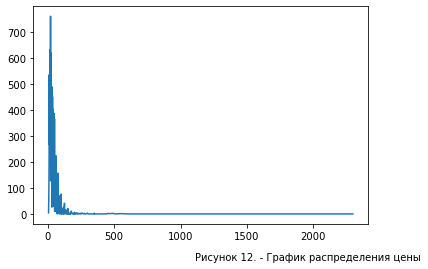

In [ ]:
df['price'].value_counts().sort_index().plot.line()
plt.figtext(0.5, 0, "Рисунок 12. - График распределения цены" )

Средняя цена

In [ ]:
avg_cost = df["price"].mean()
avg_cost


34.80422766656707

В среднем цена составляет 35$ за бутылку

In [ ]:
max_price =df [ 'price' ]. max ()

In [ ]:
print ( "Самое дорогое вино ${:.2f}" . format ( max_price ) )

Самое дорогое вино $2300.00


In [ ]:
df [df [ 'price' ]  == 2300 ]

,country,description,designation,points,price,province,region_1,variety,winery,color,continent,Good
13188,France,"A big, powerful wine that sums up the richness...",NaN,99,2300.0,Bordeaux,Pauillac,Bordeaux-style Red Blend,Château Latour,red,Europe,1


In [ ]:
min_price = df['price'].min()
print("Самое дешевое вино ${:.2f} USD".format(min_price))

Самое дешевое вино $5.00 USD


In [ ]:
df[df['price'] == 5.0]

,country,description,designation,points,price,province,region_1,variety,winery,color,continent,Good
27,Australia,"Simultaneously pruny and herbal, this medium-w...",NaN,81,5.0,Australia Other,South Eastern Australia,Cabernet Sauvignon,Kelly's Revenge,red,Oceania,0
3583,Spain,How many $5 wines are this good? Not many. The...,Abrazo del Toro,85,5.0,Northern Spain,Cariñena,Syrah,Abrazo,red,Europe,0
4321,Australia,"Possibly a little sweet, this is a soft, easyg...",NaN,83,5.0,Australia Other,South Eastern Australia,Chardonnay,Banrock Station,white,Oceania,0
6381,Portugal,"Bright, crisp raspberry flavors on a bone-dry ...",NaN,84,5.0,Vinho Verde,NaN,Rosé,Campelo,other,Europe,0
14547,Spain,"Raspberry and plum aromas lead to a jammy, pru...",Crianza,81,5.0,Levante,Utiel-Requena,Tempranillo,Viña Decana,red,Europe,0


In [ ]:
top_5 = df.groupby('country').mean().sort_values(by = ['price'],ascending = False)
top_5 = pd.DataFrame(top_5.iloc[0:5,1])
top_5['Index'] = list(range(5))
top_5['Country'] = top_5.index.values
top_5.set_index(['Index'],inplace = True)
top_5

,price,Country
Index,,
0,55.333333,Turkey
1,50.450770,France
2,50.000000,US-France
3,42.803704,Italy
4,39.588235,Canada


 Учитывая медиану для каждой страны, выделим ТОП - 5 стран, производящие самые дорогие вина

In [ ]:
#countries producing the most expensive wines

temp_expcountry_df = df.groupby("country")
# Calculates the average rating for each winery in a variable
exp_country = temp_expcountry_df["price"].median()
# Creates a new dataframe of just wineries and their average rating
exp_country_df = pd.DataFrame({"Avg Price" : exp_country})
exp_country_df

,Avg Price
country,
Argentina,15.0
Australia,21.0
Austria,24.0
Brazil,19.5
Bulgaria,8.0
Canada,30.0
Chile,14.0
Croatia,19.0
Cyprus,14.0


In [ ]:

# finds the top 20 wineries by average rating
exp_20 = exp_country_df.sort_values("Avg Price").nlargest(20, "Avg Price").index.tolist()
# updates the dataframe to include only countries in the top 20 list
exp_country_df = exp_country_df[exp_country_df.index.isin(exp_20)]
exp_country_df.head()

,Avg Price
country,
Australia,21.0
Austria,24.0
Brazil,19.5
Canada,30.0
Croatia,19.0


Text(0.5, -0.3, 'Рисунок 13. - График распределения медианы цены в зависимости от страны ')

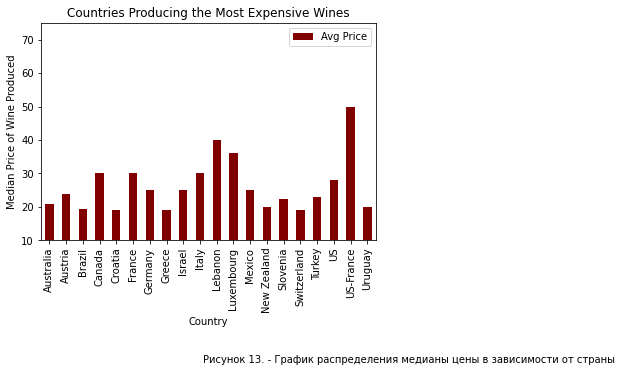

In [ ]:
exp_country_df.plot(kind='bar', title='Countries Producing the Most Expensive Wines', color='maroon')
plt.xlabel("Country")
plt.ylim(10,75)
plt.ylabel("Median Price of Wine Produced")
plt.figtext(0.5, -0.3, "Рисунок 13. - График распределения медианы цены в зависимости от страны " )

In [ ]:
#cheapest wine by country

temp_cheapcountry_df = df.groupby("country")
# Calculates the average rating for each winery in a variable
cheap_country = temp_cheapcountry_df["price"].median()
# Creates a new dataframe of just wineries and their average rating
cheap_country_df = pd.DataFrame({"Avg Price" : cheap_country})
# finds the top 20 wineries by average rating
cheapc_20 = cheap_country_df.sort_values("Avg Price").nsmallest(20, "Avg Price").index.tolist()
# updates the dataframe to include only countries in the top 20 list
cheap_country_df = cheap_country_df[cheap_country_df.index.isin(cheapc_20)]
cheap_country_df.head()

,Avg Price
country,
Argentina,15.0
Australia,21.0
Brazil,19.5
Bulgaria,8.0
Chile,14.0


<ipython-input-58-95bce3303959>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a = df[df.price <= 150][df.points <100]


Text(0.5, -0.1, 'Рисунок 14. - График зависимости рейтинга от цены')

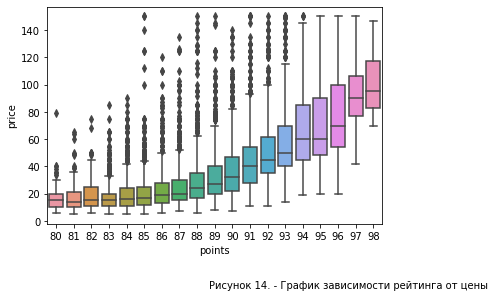

In [ ]:
a = df[df.price <= 150][df.points <100]
sns.boxplot(x = 'points', y = 'price', data = a)
plt.figtext(0.5, -0.1, "Рисунок 14. - График зависимости рейтинга от цены" )

Диаграмма рессеяния между ценой и рейтингом

Text(0.5, -0.1, 'Рисунок 14. - График зависимости цены от рейтинга')

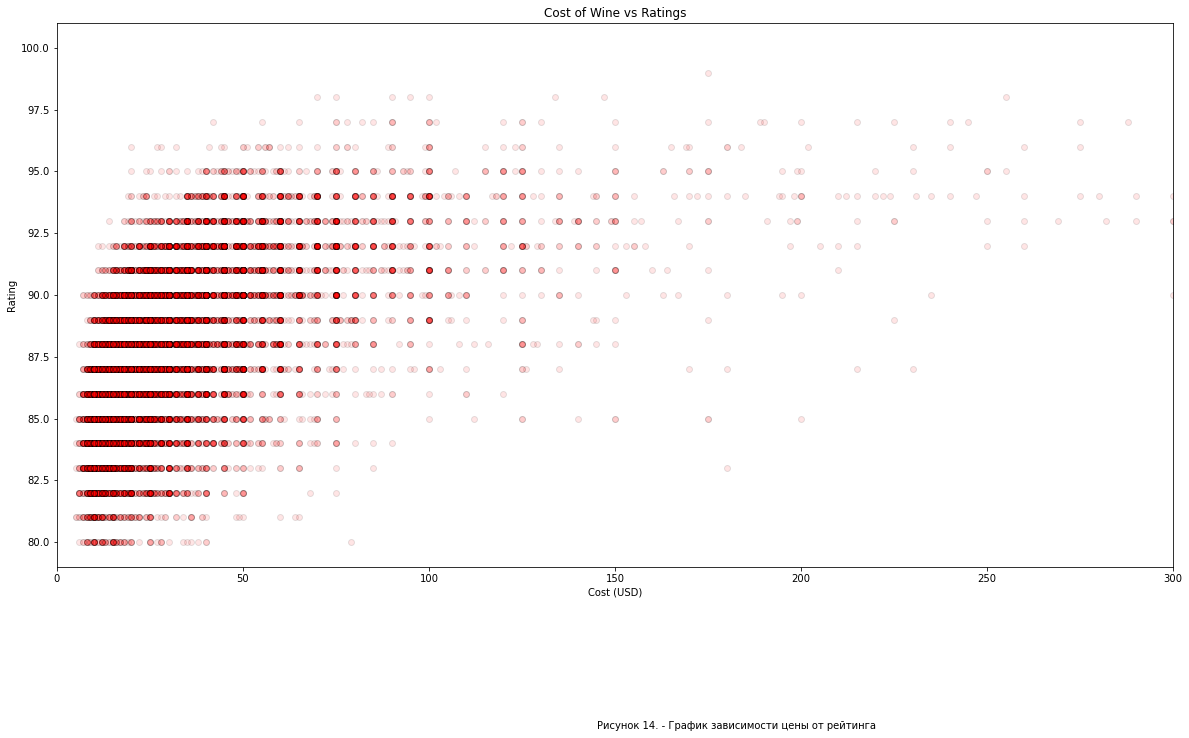

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
plt.scatter(df["price"], df["points"], facecolors="red", edgecolors="black", alpha=.1)
plt.xlim(0, 300)
plt.title("Cost of Wine vs Ratings")
plt.xlabel("Cost (USD)")
plt.ylabel("Rating")
plt.figtext(0.5, -0.1, "Рисунок 14. - График зависимости цены от рейтинга" )

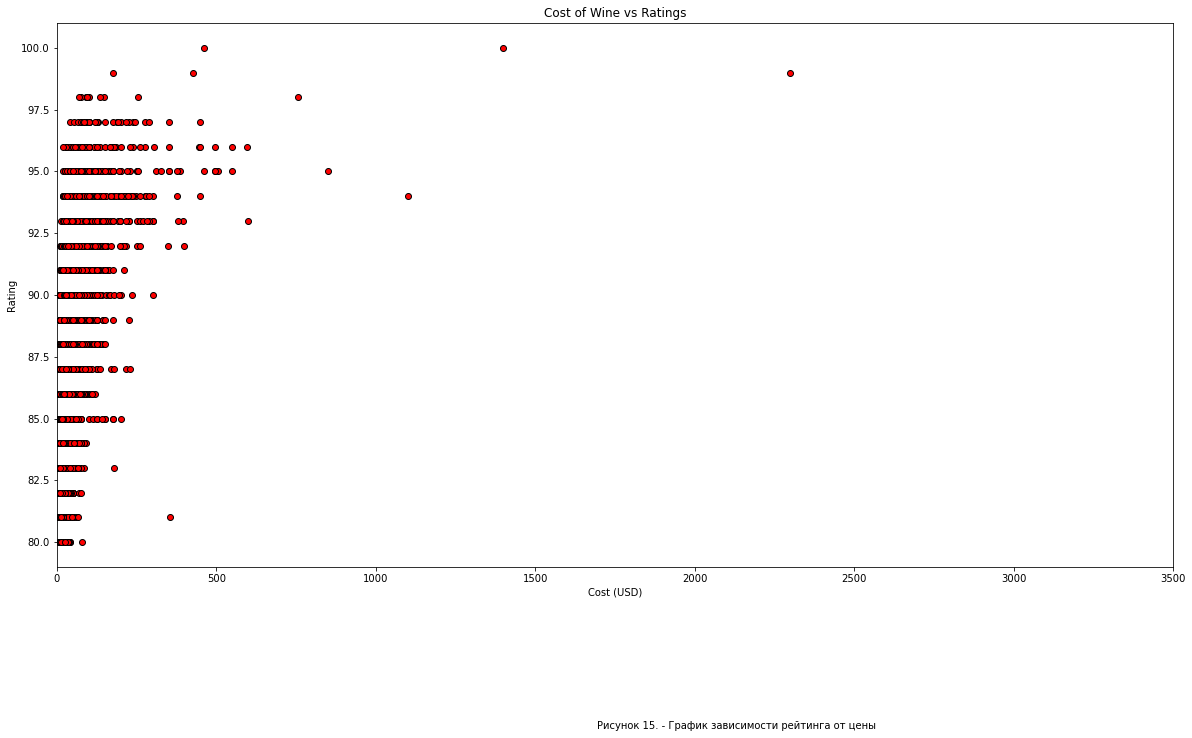

In [ ]:
#Do more expensive wines have higher ratings?
fig, ax = plt.subplots(figsize=(20,10))
plt.scatter(df["price"], df["points"], facecolors="red", edgecolors="black")
plt.xlim(0, 3500)
plt.title("Cost of Wine vs Ratings")
plt.xlabel("Cost (USD)")
plt.ylabel("Rating")
plt.figtext(0.5, -0.1, "Рисунок 15. - График зависимости рейтинга от цены" )
plt.show()

#The below diagram shows that the most expensive wines are not the highest rated.
#Also, the most expensive wines are outliers.

##  Виноградник

In [ ]:
df.designation.describe()

count        9363
unique       6473
top       Reserve
freq          283
Name: designation, dtype: object

In [ ]:
df.designation.value_counts()
df.designation.value_counts()[:10]

Reserve           283
Estate            182
Reserva           175
Estate Grown       53
Riserva            50
Estate Bottled     43
Brut               39
Old Vine           35
Dry                34
Gran Reserva       27
Name: designation, dtype: int64

In [ ]:
values_designation = df['designation'].value_counts()[:10].keys().tolist()
counts_designation = df['designation'].value_counts()[:10].tolist()

## Признак винодельня

In [ ]:
df.winery.describe()

count               13388
unique               5665
top       Williams Selyem
freq                   46
Name: winery, dtype: object

Количество виноделен использующих самое большое число сортов винограда

In [ ]:
grapes = df[["winery", "variety"]].groupby(by = "winery").count()
max_num = max(grapes["variety"])
min_num = min(grapes["variety"])
max_num

46

Количество виноделен использующих самое маленькое число сортов винограда

In [ ]:
min_num

1

### Провинции (province)

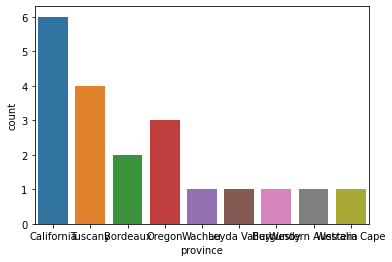

In [ ]:
import seaborn as sns
sns.countplot(df['province'].head(20))

In [ ]:
df['province'].value_counts()

California                                4806
Washington                                1004
Tuscany                                    553
Oregon                                     488
Mendoza Province                           459
                                          ... 
Imathia                                      1
Cyprus                                       1
Beira Interior                               1
Vino da Tavola della Svizzera Italiana       1
Commandaria                                  1
Name: province, Length: 255, dtype: int64

### Сорта винограда Variety(Type of grape)

In [ ]:
print('According to the dataset, there are {0} types of grapes'.format(df['variety'].nunique()))

According to the dataset, there are 32 types of grapes


Давайте внимательно рассмотрим топ-10 видов винограда в наборе данных.

In [ ]:
df_variety = df['variety'].value_counts().to_frame()
df_variety.reset_index(inplace=True)
df_variety.columns=['variety', 'counts']
df_variety_trimmed = df_variety.loc[0:9]

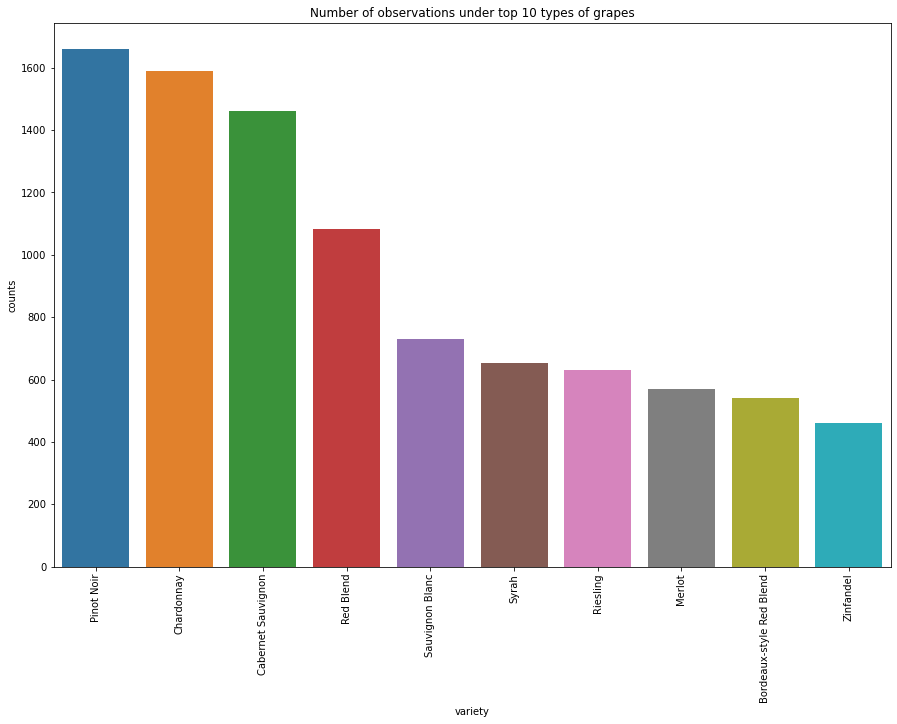

In [ ]:
fig, ax = plt.subplots(figsize=(15,10));
sns.barplot(data = df_variety_trimmed, x='variety',y='counts',ax=ax).set_title('Number of observations under top 10 types of grapes');
plt.xticks(rotation='vertical');

Пино Нуар является самым распространенным видом винограда

In [ ]:
#make top 10 types of grapes into list
grape_list=list(df_variety_trimmed['variety'])

In [ ]:
#make list of top 10 countries(wine production)

country_trimmed = df.loc[0:9]
country_list=list(country_trimmed['country'])


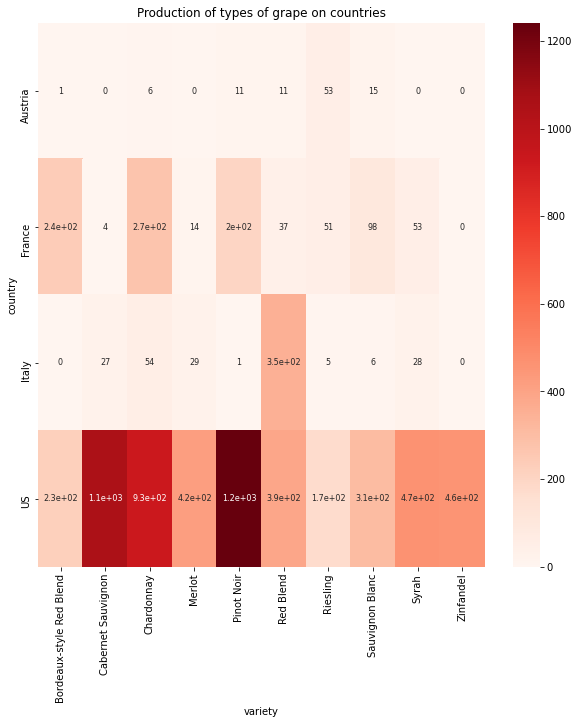

In [ ]:
#generate heatmap
df_top_variety_country= df[df['variety'].isin(grape_list)]
df_top_variety_country = df_top_variety_country[df_top_variety_country['country'].isin(country_list)]
df_top_variety_country = df_top_variety_country.groupby(['country','variety']).size().unstack(level=-1)
df_top_variety_country.replace(np.nan,0,inplace=True)

fig, ax = plt.subplots(figsize=(10,10));
sns.heatmap(df_top_variety_country,cmap = 'Reds',annot=True, annot_kws={"size": 8},ax=ax).set_title('Production of types of grape on countries');

Приведенная выше тепловая карта показывает, что набор данных смещен к вину, произведенному в США, которое производит много Пино Нуар

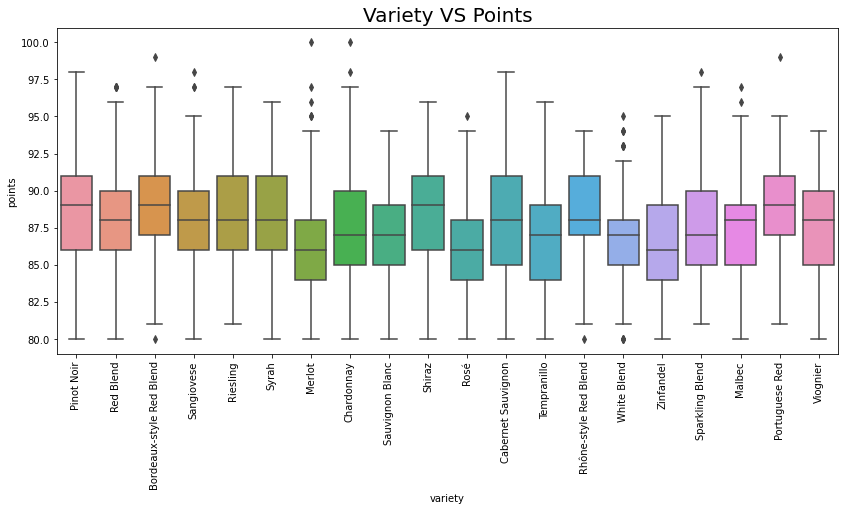

In [ ]:
V1= df[df.variety.isin(df.variety.value_counts().head(20).index)]

plt.figure(figsize = (14,6))
plt.title("Variety VS Points", fontsize=20)
sns.boxplot(
    x = 'variety',
    y = 'points',
    data = V1
)
plt.xticks(rotation = 90);

Number of varity of wines 32


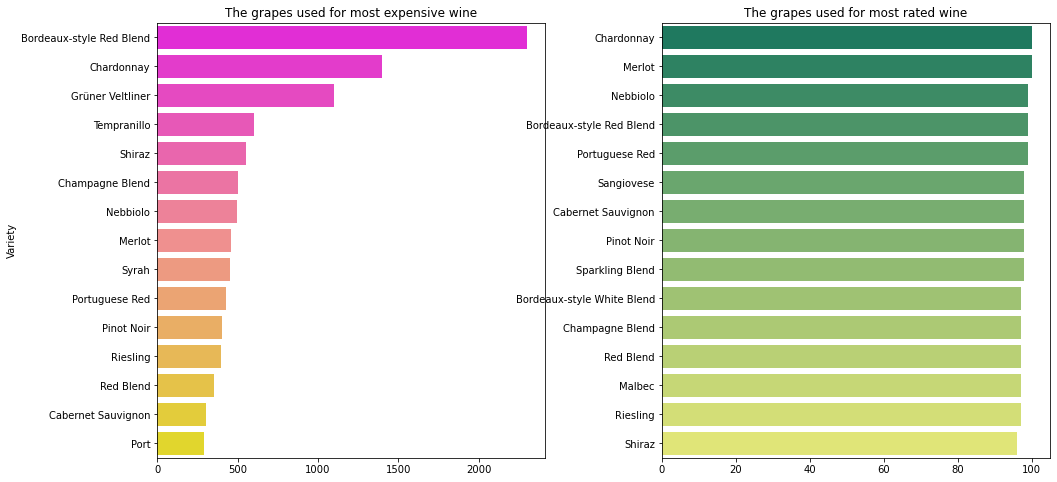

In [ ]:
print('Number of varity of wines',df['variety'].nunique())
fig,ax = plt.subplots(1,2,figsize=(16,8))
ax1,ax2 = ax.flatten()

data_to_plot = df.groupby(['variety'])['price'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = data_to_plot.price, y = data_to_plot.index, palette= 'spring',ax=ax1)
ax1.set_title('The grapes used for most expensive wine')
ax1.set_ylabel('Variety')
ax1.set_xlabel('')
data_to_plot = df.groupby(['variety'])['points'].max().sort_values(ascending=False).to_frame()[:15]
sns.barplot(x = data_to_plot.points, y = data_to_plot.index, palette = 'summer',ax=ax2)
ax2.set_title('The grapes used for most rated wine')
ax2.set_ylabel('')
ax2.set_xlabel('')
plt.subplots_adjust(wspace=0.3);

Средняя точка Пино Нуар составляет 90. Самая низкая точка для этого сорта — 80, а самая высокая точка — 98

Text(0, 0.5, 'Counts')

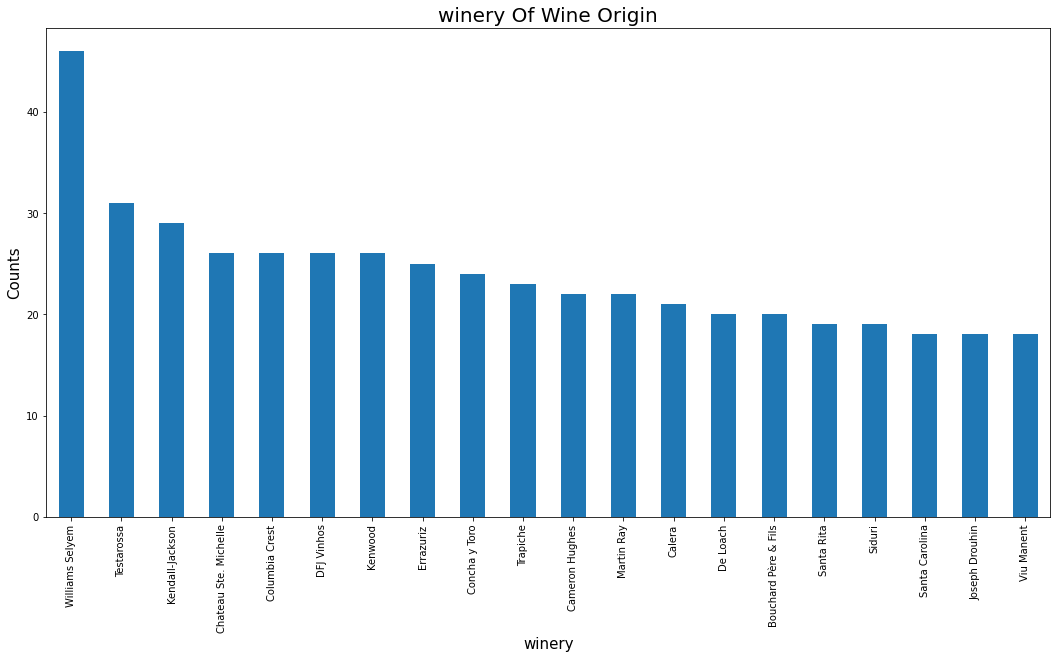

In [ ]:
plt.figure(figsize=(18,9))
Winery=df[df['winery']!='unknown']
WineryCnt=Winery['winery'].value_counts()
w = WineryCnt.head(20).plot.bar()
w.set_title("winery Of Wine Origin", fontsize=20)
w.set_xlabel("winery", fontsize=15)
w.set_ylabel("Counts", fontsize=15)

В тройку лучших виноделов входят виноделы и виноделы, Willims Selyem и DFJ Vinhos. Всем этим троим более 175 лет.

Определим самый популярный сорт вина по стране

In [ ]:
df.groupby('country').variety.apply(lambda x:x.value_counts().nlargest(1))

country                               
Argentina     Malbec                       246
Australia     Shiraz                       164
Austria       Grüner Veltliner             111
Brazil        Sparkling Blend                2
Bulgaria      Merlot                         2
Canada        Riesling                       9
Chile         Cabernet Sauvignon           155
Croatia       White Blend                    3
Cyprus        Red Blend                      1
France        Chardonnay                   272
Georgia       White Blend                    2
Germany       Riesling                     272
Greece        Red Blend                     20
Hungary       Bordeaux-style Red Blend       2
Israel        Cabernet Sauvignon            18
Italy         Red Blend                    351
Lebanon       White Blend                    2
Luxembourg    Riesling                       1
Mexico        Red Blend                      3
Moldova       Red Blend                      4
New Zealand   Sauvign

### <a name="3">3. Исследвать зависимость цены и рейтинга вина</a>
Основные задачи этапа:<br>
1. Построить линейную регрессию между ценой и рейтингом. Определить :
- Означает ли высокая цена наличие более высокие оценки?
- Выделить популярные вина (топ-10) от контитнента (страны). Объяснить разницу.
- Определить влияние рейтинга на цену в отдельном регионе.

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
y = df['price']

# Define the independent variable to be the SAT score
x1 = df['points']

Text(0, 0.5, 'Цена')

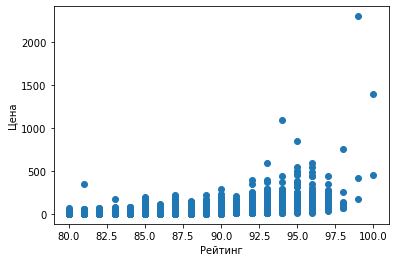

In [ ]:
plt.scatter(x1,y)
plt.xlabel('Рейтинг')
plt.ylabel('Цена')

In [ ]:
# y=b0+b1x1

x=sm.add_constant(x1)

results=sm.OLS(y,x).fit()
#Contain Ordinary Least Square Regression
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     2850.
Date:                Fri, 19 May 2023   Prob (F-statistic):               0.00
Time:                        10:51:51   Log-Likelihood:                -68056.
No. Observations:               13388   AIC:                         1.361e+05
Df Residuals:                   13386   BIC:                         1.361e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -446.6987      9.026    -49.489      0.000    -464.391    -429.006
points         5.4785      0.103     53.382      0.000       5.277       5.680
==============================================================================
Omnibus:                    30299.336   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        479061358.703
Skew:                          21.139   Prob(JB):                         0.00
Kurtosis:                     928.744   Cond. No.                     2.35e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

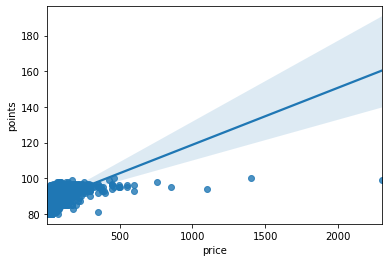

In [ ]:
sns.regplot(x="price", y="points", data=df)

In [ ]:
my_data.info()

NameError: name 'my_data' is not defined

In [ ]:
sns.regplot(x="points", y="price", data=df)
plt.xlim(75,100)

In [ ]:
from scipy.stats.stats import pearsonr
y = pearsonr(df["price"], df["points"])
y

(0.4189475715450345, 0.0)

In [ ]:
from scipy.stats.stats import pearsonr
y = pearsonr(df["points"], df["price"])
y

(0.4189475715450345, 0.0)

In [ ]:
x = df[['price']]
x.shape

(13388, 1)

In [ ]:
X = df[['price']].copy()
y = df[['points']].copy()
print(X,y)

       price
0       23.0
1      275.0
2       40.0
3       15.0
4       25.0
...      ...
19991   27.0
19993   32.0
19994   20.0
19996   50.0
19999   35.0

[13388 rows x 1 columns]        points
0          86
1          96
2          91
3          81
4          83
...       ...
19991      90
19993      94
19994      84
19996      89
19999      92

[13388 rows x 1 columns]


In [ ]:
X.shape


(13388, 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train, X_test, y_train, y_test)

       price
10894   12.0
13292   21.0
4643    40.0
3412    35.0
4786    87.0
...      ...
368     35.0
2417    20.0
2300    24.0
9787    12.0
13942   23.0

[10710 rows x 1 columns]        price
9671    50.0
14338    7.0
12229  110.0
13699   22.0
4949    24.0
...      ...
555     13.0
2057    50.0
2913    39.0
17944   16.0
11632   24.0

[2678 rows x 1 columns]        points
10894      83
13292      86
4643       91
3412       91
4786       93
...       ...
368        85
2417       90
2300       89
9787       87
13942      86

[10710 rows x 1 columns]        points
9671       91
14338      83
12229      94
13699      86
4949       88
...       ...
555        87
2057       90
2913       89
17944      87
11632      92

[2678 rows x 1 columns]


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

y_predicted = model.predict(X_test)

w = model.coef_
b = model.intercept_
print(w, b)

[[0.03286675]] [86.76477653]


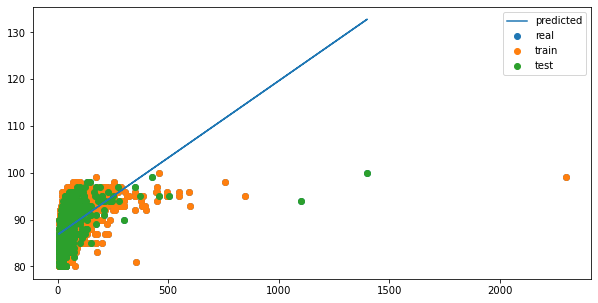

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(X, y, label='real')
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X_test, y_predicted, label='predicted')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

print('Train MSE: ', mean_squared_error(y_train, y_train_predicted))
print('Test MSE: ', mean_squared_error(y_test, y_test_predicted))

Train MSE:  8.814848114580135
Test MSE:  9.298568690220046


In [ ]:
from sklearn.metrics import mean_absolute_error

print('Train MAE: ', mean_absolute_error(y_train, y_train_predicted))
print('Test MAE: ', mean_absolute_error(y_test, y_test_predicted))

Train MAE:  2.3541575914144244
Test MAE:  2.406814456286092


In [ ]:
from sklearn.metrics import r2_score

print('Train R^2: ', r2_score(y_train, y_train_predicted))
print('Test R^2: ', r2_score(y_test, y_test_predicted))

Train R^2:  0.1778907349338722
Test R^2:  0.16495659094155402


In [ ]:
my_data = df.drop(df[df.price > 300].index)
my_data.shape

(13353, 10)

(75.0, 100.0)

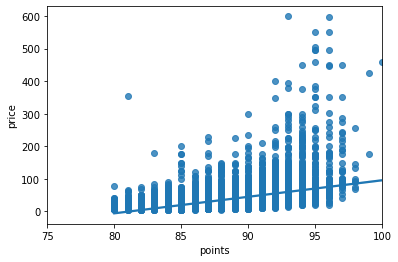

In [ ]:
sns.regplot(x="points", y="price", data=my_data)
plt.xlim(75,100)

Существует корреляция между точками, данными вину, и логорифмом цены вина. Линейная комбинация переменных может дать прямую линию, но эта линия не соответствует данным. Но одна из тенденций заключается в том, что чем больше очков, тем больше цена вина. Чтобы увидеть связь между двумя количественными переменными, я выбрал точечную диаграмму. График использует точки в качестве отметки для представления корреляции и позицию в качестве канала для репрезентации тренда.

Text(0.5, 0, 'Рисунок 8. - График корелляция между Points и Price')

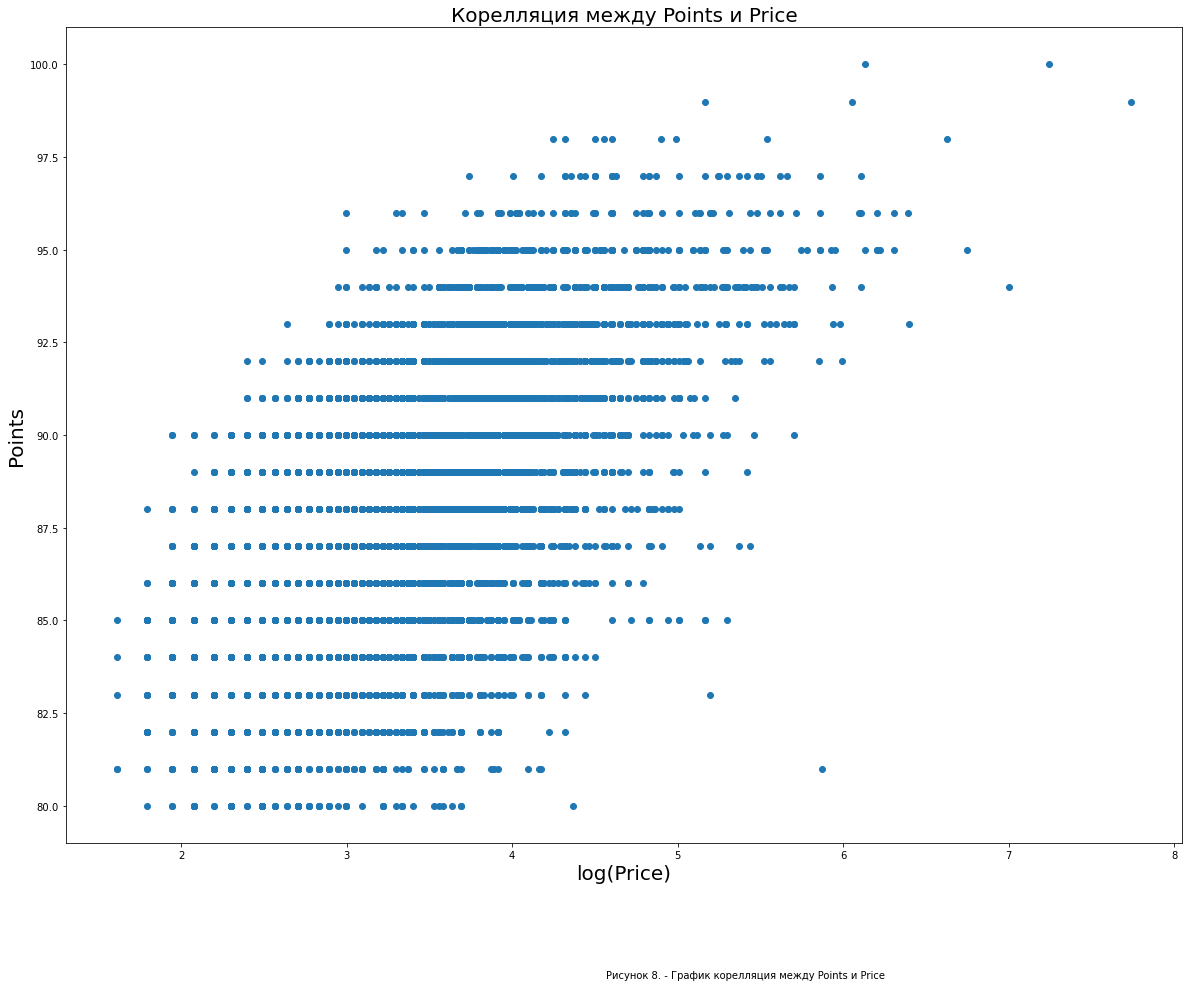

In [ ]:
fig = plt.figure(figsize=(20,15))
xx = np.log(df.price)
yy = df.points
plt.scatter(xx,yy)
plt.xlabel('log(Price)', fontsize=20)
plt.ylabel('Points', fontsize=20)
plt.title('Корелляция между Points и Price',fontsize=20)
plt.figtext(0.5, 0, "Рисунок 8. - График корелляция между Points и Price" )

In [ ]:
x = np.log(df[['price']].copy())
y = df[['points']].copy()

In [ ]:
x

,price
0,3.135494
1,5.616771
2,3.688879
3,2.708050
4,3.218876
...,...
19991,3.295837
19993,3.465736
19994,2.995732
19996,3.912023


In [ ]:
y

,points
0,4.454347
1,4.564348
2,4.510860
3,4.394449
4,4.418841
...,...
19991,4.499810
19993,4.543295
19994,4.430817
19996,4.488636


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(X_train, X_test, y_train, y_test)

          price
16284  3.555348
14875  2.302585
13842  3.891820
10304  2.564949
13539  3.258097
...         ...
5640   3.332205
19864  2.302585
16681  3.912023
11961  3.555348
4316   3.465736

[10710 rows x 1 columns]           price
12428  2.995732
16210  3.091042
17546  3.637586
13898  2.995732
7178   3.218876
...         ...
16389  2.708050
17459  4.330733
18379  3.737670
14964  3.912023
10556  3.806662

[2678 rows x 1 columns]        points
16284      84
14875      84
13842      93
10304      88
13539      87
...       ...
5640       89
19864      86
16681      90
11961      87
4316       90

[10710 rows x 1 columns]        points
12428      88
16210      85
17546      82
13898      88
7178       88
...       ...
16389      87
17459      89
18379      91
14964      84
10556      85

[2678 rows x 1 columns]


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [ ]:
y_predicted = model.predict(X_test)

w = model.coef_
b = model.intercept_
print(w, b)

[[3.02064136]] [77.98545074]


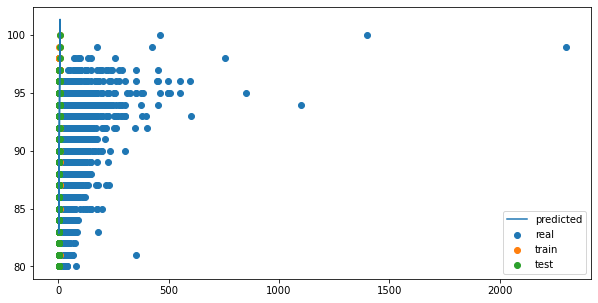

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(X, y, label='real')
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X_test, y_predicted, label='predicted')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

print('Train MSE: ', mean_squared_error(y_train, y_train_predicted))
print('Test MSE: ', mean_squared_error(y_test, y_test_predicted))

Train MSE:  6.655674834989455
Test MSE:  6.936429716897488


In [ ]:
from sklearn.metrics import mean_absolute_error

print('Train MAE: ', mean_absolute_error(y_train, y_train_predicted))
print('Test MAE: ', mean_absolute_error(y_test, y_test_predicted))

Train MAE:  2.0604861663065503
Test MAE:  2.094582148420925


In [ ]:
from sklearn.metrics import r2_score

print('Train R^2: ', r2_score(y_train, y_train_predicted))
print('Test R^2: ', r2_score(y_test, y_test_predicted))

Train R^2:  0.3826996771512402
Test R^2:  0.3638953529572293


#### <a name="4">4.Проверка гипотез</a>

- Ознчает ли дорогое вино хорошие баллы?(Проверить влияние рейтнга на цену);
- Средние пользовательские рейтинги сорта  Bordeaux-style Red Blend и Bordeaux-style Red Blend одинаковые.


Задать самостоятельно пороговое значение alpha.<br>
Пояснить:
- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.


H0: Рейтинг на вино производства Франции и на вино производства Италии одинаковы

H1: Рейтинг на вино производства Франции и на вино производства Италии различны

In [ ]:
# Two sample t test to check whether mean of charges in male significantly differ from mean of charges in female
Ho = "Рейтинг на вино производства Франции и на вино производства Италии одинаковы"   # Stating the Null Hypothesis
Ha = "Рейтинг на вино производства Франции и на вино производства Италии различны"   # Stating the Alternate Hypothesis
t = df[df.country == 'France']
g= df[df.country == 'Italy']
x = np.array(t[t.price < 200 ].points)  # Selecting charges corresponding to smokers as an array
y = np.array(g[g.price < 200].points) # Selecting charges corresponding to non-smokers as an array


In [ ]:
import scipy.stats as stat
value, p = stat.normaltest(t[t.price < 300 ].points.sample(200))
print(value, p)
if p < 0.05:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

5.335043440780621 0.06942406453212557
Отклонить гипотезу о нормальности


In [ ]:
import scipy.stats as stat
value, p = stat.normaltest(g[g.price < 200].points.sample(200))
print(value, p)
if p < 0.05:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

3.567750207238454 0.1679859215111467
Отклонить гипотезу о нормальности


In [ ]:
results = stat.levene(x, y)

alpha = 0.05

print(results.pvalue)

if (results.pvalue < alpha):
    print('Отклонить гипотезу о равенстве дисперсий')
else:
    print('Принять гипотезу о равенстве дисперсий')

0.0007189256915161562
Отклонить гипотезу о равенстве дисперсий


In [ ]:

t,p_value  = stat.ttest_ind(x,y, axis = 0, equal_var=False)

if p_value < 0.05:
    print(f'{Ha} так как p value - {p_value.round(3)} < 0.05')
else:
    print(f'{Ho} так как p value - {p_value.round(3)} > 0.05')


Рейтинг на вино производства Франции и на вино производства Италии одинаковы так как p value - 0.653 > 0.05


In [ ]:

t,p_value  = stat.ttest_ind(x,y, axis = 0, equal_var=False, alternative='less')

if p_value < 0.05:
    print(f'{Ha} так как p value - {p_value.round(3)} < 0.05')
else:
    print(f'{Ho} так как p value - {p_value.round(3)} > 0.05')


Рейтинг на вино производства Франции и на вино производства Италии одинаковы так как p value - 0.326 > 0.05


In [ ]:

t,p_value  = stat.ttest_ind(x,y, axis = 0, equal_var=False, alternative='greater')

if p_value < 0.05:
    print(f'{Ha} так как p value - {p_value.round(3)} < 0.05')
else:
    print(f'{Ho} так как p value - {p_value.round(3)} > 0.05')


Рейтинг на вино производства Франции и на вино производства Италии одинаковы так как p value - 0.674 > 0.05


### <a name="5">5. Выводы</a>

In [ ]:
? почему цены в европе дорогие

In [ ]:
? почему рейтинг самый высокий в ...

In [ ]:
? сорт вина почему

In [ ]:
? Бордо - самые высокие оценки как и пино нуар

Рисунки должны быть подписаны


<center>Список литературы</center>

1. Андерсон, К, Аналитическая культура: от сбора данных до бизнес-результатов / Карл Андерсон. - Москва : Манн, Иванов и Фербер, 2017. - 324 с.
2. Бенгфорт Бенджамин, Билбро Ребекка, Охеда Тони, Прикладной анализ текстовых данных на Python. Машинное обучение и создание приложений обработки естественного языка. — СПб.: Питер, 2019.
3. Мэтиз Э., Изучаем Python. Программирование игр, визуализация данных, веб-приложения. — СПб.: Питер, 2017.
4.  Плас Дж. Вандер, Python для сложных задач: наука о данных и машинное обучение. — СПб.: Питер, 2018.
5. Рашка С., Рашка С. Р28 Python и машинное обучение / пер. с англ. А. В. Логунова. - М.: ДМК Пресс, 2017.  
6.  Шарден Б., Массарон Л., Боскетти А.,  Крупномасштабное машинное обучение вместе с Python. Пер. с анг. А. В. Логунова. – М.: ДМК Пресс, 2018.